In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
header = ["Class Name", "handicapped-infants", "water-project-cost-sharing", "adoption-of-the-budget-resolution",
         "physician-fee-freeze","el-salvador-aid","religious-groups-in-schools","anti-satellite-test-ban",
         "aid-to-nicaraguan-contras","mx-missile","immigration","synfuels-corporation-cutback","education-spending",
         "superfund-right-to-sue","crime","duty-free-exports","export-administration-act-south-africa"]


data = pd.read_csv('./house-votes-84.data', names=header,na_values= '?')

In [3]:
data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


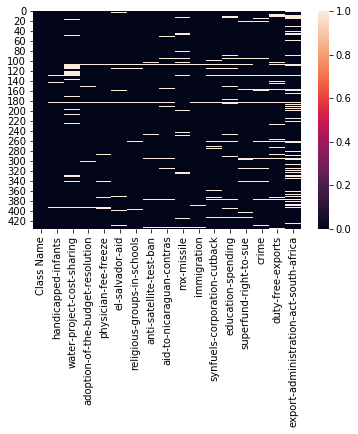

In [4]:
sb.heatmap(data.isnull())

In [5]:
new_data = data.dropna()

In [6]:
new_data = new_data.replace('y',1)
new_data = new_data.replace('n',0)
new_data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [7]:
X = new_data.iloc[:,1:]
y = new_data["Class Name"]

## Logistic regression using all the features

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

predicted_classes = model.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
accuracy = accuracy_score(y_test,predicted_classes)

print('le score du modèle : ',accuracy)

le score du modèle :  0.9428571428571428


## Using Wrapper feature selection

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func=chi2,k=4).fit_transform(X,y)

new_X = pd.DataFrame(data=selector)
new_X.head()

,0,1,2,3
0,1,0,1,0
1,0,1,1,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=101)

model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
predicted_classes = model.predict(X_test)

accuracy = accuracy_score(y_test,predicted_classes)

print('le score du modèle : ',accuracy)

le score du modèle :  0.9571428571428572


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

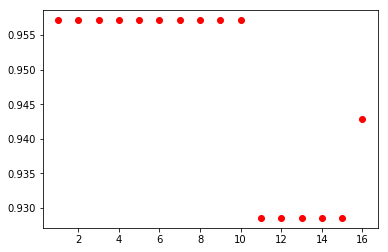

In [15]:
n_estimator = [i for i in range(1,17)]
accuracy = []

for n in n_estimator:
    selector = SelectKBest(score_func=chi2,k=n).fit_transform(X,y)
    new_X = pd.DataFrame(data=selector)
    
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=101)

    model.fit(X_train, y_train)
    predicted_classes = model.predict(X_test)
    
    accuracy.append(accuracy_score(y_test,predicted_classes))
    

plt.plot(n_estimator,accuracy, 'ro')
plt.show()

## Using Filter feature selection

In [17]:
data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


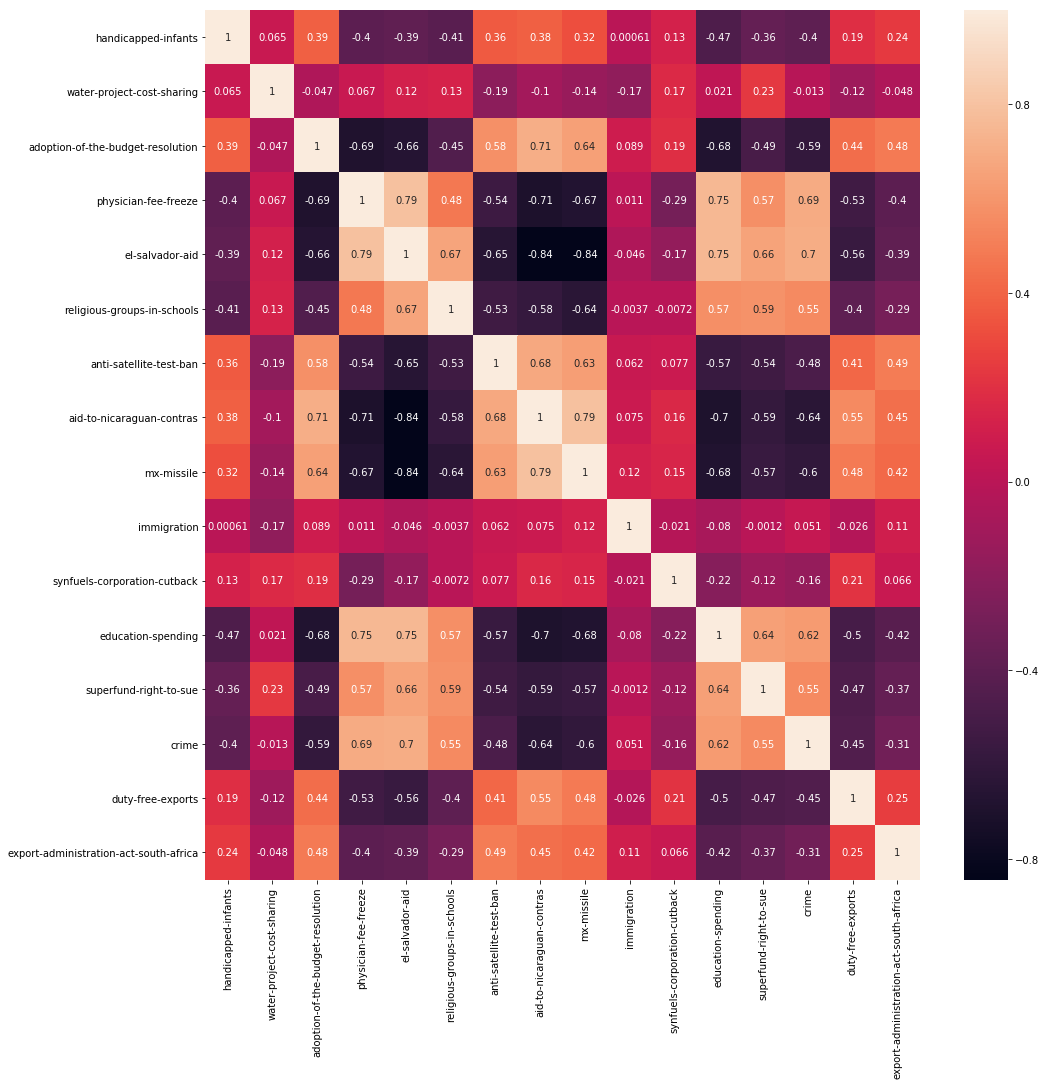

In [18]:
plt.figure(figsize=(16,16))
sb.heatmap(new_data.corr(),annot=True)